# OpenFoodFacts - Analysis of Taxonomies

- packaging shapes taxonomy
- packaging materials taxonomy
- categories taxonomy (too big to display!)

In [1]:
!pip install python-slugify networkx scipy pydot

In [2]:
from urllib.request import urlopen
from slugify import slugify
import networkx as nx
import matplotlib.pyplot as plt

## Download Taxonomy File from Git

In [3]:
#url = "https://github.com/openfoodfacts/openfoodfacts-server/raw/main/taxonomies/packaging_shapes.txt"
url = "https://github.com/openfoodfacts/openfoodfacts-server/raw/main/taxonomies/packaging_materials.txt"
#url = "https://github.com/openfoodfacts/openfoodfacts-server/raw/main/taxonomies/categories.txt"

In [4]:
with urlopen(url) as response:
   txt = response.read()

## Parse taxonomy and create a list of edges between the categories (nodes)

In [5]:
# accumulators
nodes = {}
edges = []
dupes = []
G = nx.DiGraph()

#current state
parents = []
en_name = None
xx_name = None

for i, line in enumerate(txt.decode('UTF-8').splitlines()):

    # memorize category parents
    if line.startswith('<en:') or line.startswith('<xx:'):
        parents.append(line[1:])

    # clear parents and names when current category block ends
    if line.strip() == '':
        parents = []
        en_name = None
        xx_name = None
    
    if line.startswith('en:') or line.startswith('xx:'):
        first_name = line.split(',')[0].strip()
        lang = first_name[:2]

        # check for duplicates
        node = nodes.get(first_name)
        if node != None:
            dupes.append(f"'{first_name}' in line {i}")

        slug = slugify(first_name[3:])
        if (len(parents) != 0):
            for p in parents:
                G.add_edge(slugify(p[3:]), slugify(first_name[3:]))
                #edges.append(f"  {slugify(p)} --- {slug}")
        else:
            G.add_node(slugify(first_name[3:]))
            #edges.append(f"  {slug}")

print("#nodes:", len(G.nodes))
print("#edges:", len(G.edges))

#nodes: 371
#edges: 369


## Categories without a Parent Category

In [6]:
# Find all root nodes (nodes with no incoming edges)
root_nodes = [node for node, in_degree in G.in_degree() if in_degree == 0]
", ".join(root_nodes)

'unknown, plastic, composite-material, recyclable-material, recycled-material, cellophane, mixed-plastics, other-plastics, polyethylene-terephthalate, silicone, multilayer-composite, lead-acid-battery, 08-lead, alkaline-battery, 09-alkaline, nickel-cadmium-battery, 10-nicd, nickel-metal-hydride-battery, 11-nimh, lithium-battery, 12-li, silver-oxide-battery, 13-so-z, zinc-carbon-battery, 14-cz, paper-or-cardboard, baking-paper, cellulose, rubber, wax, metal, metals, wood, 50-for, cork, 51-for, textile, 52-for, 61-tex-jute, 61-tex, glass, sig, elopak, italpack, sandstone, porcelain, ceramic, fabric, adhesive-tape, gas'

# Visualize Taxonomy with Dot

In [7]:
Tax = nx.DiGraph()
Tax.add_nodes_from(sorted(G.nodes, reverse=True))
Tax.add_edges_from(G.edges)
#print(Tax.nodes)

In [12]:
import pydot
from networkx.drawing.nx_pydot import to_pydot

# Convert NetworkX graph to a PyDot graph object
P = to_pydot(Tax)

P.set('rankdir', 'LR')
P.set('nodesep', '0.1')  # smaller values mean nodes are closer together
P.set('ranksep', '0.5')  # adjust as needed

# Set node shape to box
for node in P.get_nodes():
    node.set_shape('box')
    node.set_height(0) # remove top/bottom padding
    node.set_fontsize(10)

# Visualize the graph (this will save the graph as a PNG file)
P.write_png('graph.png')

/var/folders/yz/vvwzcc9178l36z8l4fc42bkm0000gn/T/ipykernel_2438/297205186.py:5: DeprecationWarning: nx.nx_pydot.to_pydot depends on the pydot package, which has known issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  P = to_pydot(Tax)


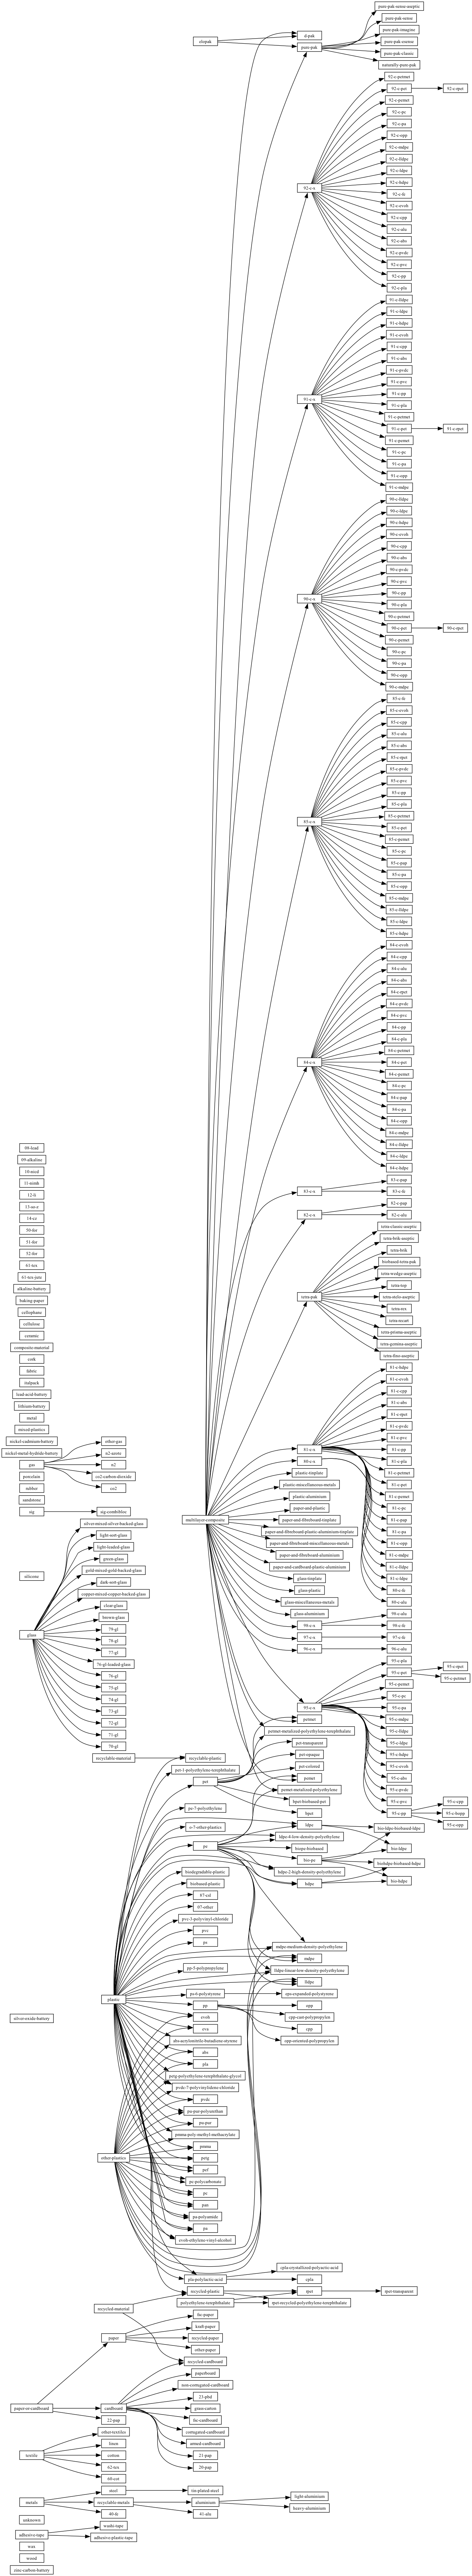

In [13]:
from IPython.display import Image
Image(filename='graph.png')